# Data cleansing:

1. Import libraries and open the survey:

In [39]:
import pandas as pd

In [40]:
data = pd.read_excel('survey_answers.xlsx')
data.head()
#data = data.applymap(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

data.head()

,Marca temporal,¿Preferirías vivir de alquiler o compra?,¿Cuántos años tienes?,¿Cuál es tu género?,Selecciona los distritos dónde buscarías actualmente casa (se pueden marcar hasta 5 opciones):,¿En qué estado prefieres la vivienda? (puedes seleccionar varias opciones),¿Qué aspectos son para ti más importantes a la hora de buscar vivienda? (puedes marcar hasta 5 opciones),¿En qué planta te gustaría vivir?,¿Prefieres vivir solo o acompañado?,¿Cuántas habitaciones buscas?,¿Cuántos baños necesitas?,¿Cuánto dinero al mes estarías dispuesto a destinar (entre tú y las personas con las que vivirías para pagar la vivienda si decidieras convivir)?,"Si compraras una casa, ¿durante cuántos años estarías dispuesto a hipotecarte?",¿Cuántos m2 buscas?
0,2024-01-09 21:08:43.857,Compra,Entre 25 y 30,Masculino,Fuencarral-El Pardo,En buen estado,"Buenos servicios (supermercados, cafeterías, f...","Plantas intermedias, Casa/Chalet",Con mi pareja,2,1,800-1000 €/mes,entre 20 y 25,entre 70 m2 y 90 m2
1,2024-01-09 21:25:03.589,Compra,Entre 30 y 40,Masculino,Hortaleza,A reformar,"Buenos servicios (supermercados, cafeterías, f...",Plantas intermedias,Con mi pareja,2,1,600-800 €/mes,entre 30 y 35,entre 70 m2 y 90 m2
2,2024-01-09 21:35:39.487,Compra,Entre 30 y 40,Femenino,"Centro, Retiro, B.Salamanca",Nueva,"Buen transporte público, Terraza, Piscina, Bue...",Ático,Con mi pareja,3,2,800-1000 €/mes,menos de 20,entre 90 m2 y 120 m2
3,2024-01-09 21:39:10.690,Compra,Entre 25 y 30,Femenino,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",En buen estado,"Buen transporte público, Ascensor, Garaje, Bue...","Ático, Casa/Chalet",Con mi pareja,3,2,400-600 €/mes,entre 25 y 30,entre 90 m2 y 120 m2
4,2024-01-09 21:39:23.857,Compra,Entre 30 y 40,Femenino,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",En buen estado,"Buen transporte público, Terraza, Garaje, Buen...",Plantas intermedias,Con mi pareja,3,2,1000-1500 €/mes,entre 30 y 35,entre 90 m2 y 120 m2


2. Transform survey into data that can be managed by stadistical approaches: 

In [41]:
data.columns

Index(['Marca temporal', '¿Preferirías vivir de alquiler o compra?',
       '¿Cuántos años tienes?', '¿Cuál es tu género?',
       'Selecciona los distritos dónde buscarías actualmente casa (se pueden marcar hasta 5 opciones):',
       '¿En qué estado prefieres la vivienda? (puedes seleccionar varias opciones)',
       '¿Qué aspectos son para ti más importantes a la hora de buscar vivienda? (puedes marcar hasta 5 opciones)',
       '¿En qué planta te gustaría vivir?',
       '¿Prefieres vivir solo o acompañado?', '¿Cuántas habitaciones buscas?',
       '¿Cuántos baños necesitas?',
       '¿Cuánto dinero al mes estarías dispuesto a destinar (entre tú y las personas con las que vivirías para pagar la vivienda si decidieras convivir)?',
       'Si compraras una casa, ¿durante cuántos años estarías dispuesto a hipotecarte?',
       '¿Cuántos m2 buscas?'],
      dtype='object')

In [42]:
data = data.rename(columns={'Marca temporal': 'record_date', 
                          '¿Preferirías vivir de alquiler o compra?': 'contract_type',
                          '¿Cuántos años tienes?':'age',
                         '¿Cuál es tu género?':'gender',
                         'Selecciona los distritos dónde buscarías actualmente casa (se pueden marcar hasta 5 opciones):':'districts',
                         '¿En qué estado prefieres la vivienda? (puedes seleccionar varias opciones)':'house_status',
                         '¿Qué aspectos son para ti más importantes a la hora de buscar vivienda? (puedes marcar hasta 5 opciones)': 'client_priorities',
                         '¿En qué planta te gustaría vivir?':'floor',
                         '¿Prefieres vivir solo o acompañado?':'way_of_living',
                         '¿Cuántas habitaciones buscas?':'rooms',
                         '¿Cuántos baños necesitas?':'bathrooms',
                         '¿Cuánto dinero al mes estarías dispuesto a destinar (entre tú y las personas con las que vivirías para pagar la vivienda si decidieras convivir)?':'monthly_quota',
                         'Si compraras una casa, ¿durante cuántos años estarías dispuesto a hipotecarte?':'mortgage_years',
                         '¿Cuántos m2 buscas?':'house_area'})
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,bathrooms,monthly_quota,mortgage_years,house_area
0,2024-01-09 21:08:43.857,Compra,Entre 25 y 30,Masculino,Fuencarral-El Pardo,En buen estado,"Buenos servicios (supermercados, cafeterías, f...","Plantas intermedias, Casa/Chalet",Con mi pareja,2,1,800-1000 €/mes,entre 20 y 25,entre 70 m2 y 90 m2
1,2024-01-09 21:25:03.589,Compra,Entre 30 y 40,Masculino,Hortaleza,A reformar,"Buenos servicios (supermercados, cafeterías, f...",Plantas intermedias,Con mi pareja,2,1,600-800 €/mes,entre 30 y 35,entre 70 m2 y 90 m2
2,2024-01-09 21:35:39.487,Compra,Entre 30 y 40,Femenino,"Centro, Retiro, B.Salamanca",Nueva,"Buen transporte público, Terraza, Piscina, Bue...",Ático,Con mi pareja,3,2,800-1000 €/mes,menos de 20,entre 90 m2 y 120 m2
3,2024-01-09 21:39:10.690,Compra,Entre 25 y 30,Femenino,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",En buen estado,"Buen transporte público, Ascensor, Garaje, Bue...","Ático, Casa/Chalet",Con mi pareja,3,2,400-600 €/mes,entre 25 y 30,entre 90 m2 y 120 m2
4,2024-01-09 21:39:23.857,Compra,Entre 30 y 40,Femenino,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",En buen estado,"Buen transporte público, Terraza, Garaje, Buen...",Plantas intermedias,Con mi pareja,3,2,1000-1500 €/mes,entre 30 y 35,entre 90 m2 y 120 m2


In [43]:
def replace_values(df,column_name,mapping_value):
    df[column_name] = df[column_name].map(mapping_value)



In [44]:

print(data.contract_type.value_counts())
mapping_contract = {'Compra':'purchase','Alquiler':'rent','No lo tengo claro':'doubts'}
replace_values(data, 'contract_type', mapping_contract)
print(data.contract_type.value_counts())

Compra               106
Alquiler               5
No lo tengo claro      2
Name: contract_type, dtype: int64
purchase    106
rent          5
doubts        2
Name: contract_type, dtype: int64


In [45]:

print(data.age.value_counts())
mapping_age = {'Entre 30 y 40':'30-40',
               'Entre 25 y 30':'25-30',
               'Menos de 25':'<25',
              'Entre 40 y 50':'40-50',
               'Entre 50 y 60':'50-60',
               'Más de 60': '>60',
               'Prefiero no decirlo': 'Prefer not to say'
              }
replace_values(data, 'age', mapping_age)
print(data.age.value_counts())

Entre 30 y 40          42
Entre 25 y 30          36
Entre 40 y 50          10
Menos de 25            10
Entre 50 y 60           8
Más de 60               5
Prefiero no decirlo     1
Name: age, dtype: int64
30-40                42
25-30                36
40-50                10
<25                  10
50-60                 8
>60                   5
Prefer not to say     1
Name: age, dtype: int64


In [46]:

print(data.gender.value_counts())
mapping_gender = {
    'Femenino':'female',
    'Masculino': 'male'
}
replace_values(data, 'gender', mapping_gender)
print(data.gender.value_counts())

Femenino     63
Masculino    50
Name: gender, dtype: int64
female    63
male      50
Name: gender, dtype: int64


In [47]:
print(data.house_status.value_counts())
mapping_status = {
    'En buen estado':'good status',
    'Nueva': 'new',
    'A reformar':'to reform',
    'En buen estado, Nueva':'good status,new',
    'A reformar, Nueva':'to reform,new',
    'A reformar, En buen estado':'to reform,good status'
    
    
}
replace_values(data, 'house_status', mapping_status)
print(data.house_status.value_counts())

En buen estado                       34
En buen estado, Nueva                24
Nueva                                17
A reformar, En buen estado, Nueva    12
A reformar                           11
A reformar, Nueva                     8
A reformar, En buen estado            7
Name: house_status, dtype: int64
good status              34
good status,new          24
new                      17
to reform                11
to reform,new             8
to reform,good status     7
Name: house_status, dtype: int64


In [48]:
print(data.floor.value_counts())

data['floor'] = data['floor'].str.replace('Plantas intermedias', 'middle_floors', regex=True)
data['floor'] = data['floor'].str.replace('Ático', 'attic', regex=True)
data['floor'] = data['floor'].str.replace('Casa/Chalet', 'house/chalet', regex=True)
data['floor'] = data['floor'].str.replace('Bajo', 'ground_floor', regex=True)

print(data.floor.value_counts())

Plantas intermedias                              28
Ático, Casa/Chalet                               16
Plantas intermedias, Ático                       15
Plantas intermedias, Ático, Casa/Chalet          12
Casa/Chalet                                      11
Ático                                             9
Plantas intermedias, Casa/Chalet                  8
Bajo                                              3
Bajo, Casa/Chalet                                 3
Bajo, Ático, Casa/Chalet                          3
Bajo, Plantas intermedias, Ático, Casa/Chalet     2
Bajo, Plantas intermedias, Ático                  1
Bajo, Plantas intermedias, Casa/Chalet            1
Name: floor, dtype: int64
middle_floors                                       28
attic, house/chalet                                 16
middle_floors, attic                                15
middle_floors, attic, house/chalet                  12
house/chalet                                        11
attic                  

In [49]:
print(data.way_of_living.value_counts())
mapping_living = {
    'Con mi pareja':'partner',
    'Con mi familia': 'family',
    'Solo':'alone',
    'No lo tengo claro':'doubts',
    'Con amigos':'friends',
    'Con compañeros de piso':'roommates'
    
    
}
replace_values(data, 'way_of_living', mapping_living)
print(data.way_of_living.value_counts())

Con mi pareja             54
Con mi familia            40
Solo                      11
No lo tengo claro          5
Con amigos                 2
Con compañeros de piso     1
Name: way_of_living, dtype: int64
partner      54
family       40
alone        11
doubts        5
friends       2
roommates     1
Name: way_of_living, dtype: int64


In [50]:
#print(data.client_priorities.value_counts())
data['client_priorities'] = data['client_priorities'].str.replace('Buenos servicios \(supermercados, cafeterías, farmacia\.\.\.\) cerca', 'good services', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Ascensor', 'elevator', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Terraza', 'terrace', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Piscina', 'swimming_pool', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Exterior', 'exterior', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Portero', 'porter', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Garaje', 'garage', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Aire acondicionado', 'air-conditioning', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Buen transporte público', 'public transport', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Armarios empotrados', 'wardrobes', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Trastero', 'storage room', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace('Vivienda accesible', 'accessible housing', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace(' ,', ',', regex=True)
data['client_priorities'] = data['client_priorities'].str.replace(', ', ',', regex=True)
#data['client_priorities'] = data['client_priorities'].str.replace('Buenos servicios (supermercados, cafeterías, farmacia...) cerca', 'good services')
print(data.client_priorities.value_counts())

public transport,terrace,elevator,garage,good services           3
public transport,terrace,good services,exterior                  3
good services                                                    3
public transport,terrace,swimming_pool,good services,exterior    3
public transport,terrace,elevator,good services,exterior         2
                                                                ..
public transport,terrace,elevator,good services,wardrobes        1
terrace,garage,good services,wardrobes                           1
terrace,elevator,garage,air-conditioning,exterior                1
public transport,elevator,garage,good services,Jardín            1
terrace,elevator,garage,good services,air-conditioning           1
Name: client_priorities, Length: 95, dtype: int64


In [51]:
data.head()
data['mortgage_years'] = data['mortgage_years'].str.replace('entre', '', regex=True)
data['mortgage_years'] = data['mortgage_years'].str.replace(' y ', '-', regex=True)
data['mortgage_years'] = data['mortgage_years'].str.replace('menos de ', '<', regex=True)
data['house_area'] = data['house_area'].str.replace('entre', '', regex=True)
data['house_area'] = data['house_area'].str.replace(' y ', '-', regex=True)
data['house_area'] = data['house_area'].str.replace(' m2', '', regex=True)
data['house_area'] = data['house_area'].str.replace('más de ', '>', regex=True)
data['monthly_quota'] = data['monthly_quota'].str.replace('mes', 'monthly', regex=True)
data['monthly_quota'] = data['monthly_quota'].str.replace('No lo tengo claro', 'doubts', regex=True)
data['mortgage_years'] = data['mortgage_years'].str.replace('No lo tengo claro', 'doubts', regex=True)
data['mortgage_years'] = data['mortgage_years'].str.replace('Prefiero no decirlo', 'prefer not to say', regex=True)
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,bathrooms,monthly_quota,mortgage_years,house_area
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,1,800-1000 €/monthly,20-25,70-90
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,1,600-800 €/monthly,30-35,70-90
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro, Retiro, B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,2,800-1000 €/monthly,<20,90-120
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,2,400-600 €/monthly,25-30,90-120
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,2,1000-1500 €/monthly,30-35,90-120


In [52]:
print(data.house_area.value_counts())
print(data.monthly_quota.value_counts())
print(data.mortgage_years.value_counts())

 90-120                  38
 70-90                   23
>120                     20
 90-120, >120            10
 50-70                    7
 70-90,  90-120           7
<50,  50-70               2
 50-70,  70-90            2
 70-90,  90-120, >120     2
<50                       1
Name: house_area, dtype: int64
1000-1500 €/monthly    35
800-1000 €/monthly     30
1500-2000 €/monthly    18
600-800 €/monthly      11
400-600 €/monthly      10
doubts                  7
> 2000€/monthly         2
Name: monthly_quota, dtype: int64
 25-30               39
 20-25               28
 30-35               20
<20                  15
doubts                8
prefer not to say     3
Name: mortgage_years, dtype: int64


In [53]:
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,bathrooms,monthly_quota,mortgage_years,house_area
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,1,800-1000 €/monthly,20-25,70-90
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,1,600-800 €/monthly,30-35,70-90
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro, Retiro, B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,2,800-1000 €/monthly,<20,90-120
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,2,400-600 €/monthly,25-30,90-120
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,2,1000-1500 €/monthly,30-35,90-120


In [54]:
data['monthly_quota'] = data['monthly_quota'].str.replace(' €/monthly', '')
data[['min_quota', 'max_quota']] = data['monthly_quota'].str.split('-', expand=True)

# Convertir las nuevas columnas a numérico (si es necesario)
data['min_quota'] = pd.to_numeric(data['min_quota'], errors='coerce')


data['max_quota'] = pd.to_numeric(data['max_quota'], errors='coerce')
data.head()
print(data.max_quota.value_counts())
print(data.min_quota.value_counts())

1500.0    35
1000.0    30
2000.0    18
800.0     11
600.0     10
Name: max_quota, dtype: int64
1000.0    35
800.0     30
1500.0    18
600.0     11
400.0     10
Name: min_quota, dtype: int64


In [55]:
data['mortgage_years'] = data['mortgage_years'].str.replace('<', '')
data['mortgage_years'] = data['mortgage_years'].str.replace('>', '')
data[['min_years', 'max_years']] = data['mortgage_years'].str.split('-', expand=True)

# Convertir las nuevas columnas a numérico (si es necesario)
data['min_years'] = pd.to_numeric(data['min_years'], errors='coerce')


data['max_years'] = pd.to_numeric(data['max_years'], errors='coerce')
data.head()
print(data.max_years.value_counts())
print(data.min_years.value_counts())

30.0    39
25.0    28
35.0    20
Name: max_years, dtype: int64
20.0    43
25.0    39
30.0    20
Name: min_years, dtype: int64


# Estimate mortgage amounts

In [56]:
def min_mor(row):
    quota = row['min_quota']
    interest = 4
    years = row['min_years']

    # Convertir la tasa de interés anual a tasa mensual y decimal
    monthly_interest = interest / 12 / 100
    
    # Calcular el número total de pagos
    total_quotas = years * 12
    
    # Calcular el factor de amortización
    amortizacion_factor = (monthly_interest * (1 + monthly_interest) ** total_quotas) / ((1 + monthly_interest) ** total_quotas - 1)
    
    # Calcular el monto del préstamo
    total = quota / amortizacion_factor
    
    return total



# Aplicar la función a cada fila del DataFrame

data['min_loan'] = 1.2*(data.apply(min_mor, axis=1))
data['min_saving'] = 0.4*(data.apply(min_mor, axis=1))# Mostrar el DataFrame con la nueva columna 'total_loan'
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,bathrooms,monthly_quota,mortgage_years,house_area,min_quota,max_quota,min_years,max_years,min_loan,min_saving
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,1,800-1000,20-25,70-90,800.0,1000.0,20.0,25.0,158420.983914,52806.994638
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,1,600-800,30-35,70-90,600.0,800.0,30.0,35.0,150812.093127,50270.697709
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro, Retiro, B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,2,800-1000,20,90-120,800.0,1000.0,20.0,NaN,158420.983914,52806.994638
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,2,400-600,25-30,90-120,400.0,600.0,25.0,30.0,90937.191828,30312.397276
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,2,1000-1500,30-35,90-120,1000.0,1500.0,30.0,35.0,251353.488545,83784.496182


In [57]:
def max_mor(row):
    quota = row['max_quota']
    interest = 4
    years = row['max_years']

    # Annual rate:
    monthly_interest = interest / 12 / 100
    
    # Quotas
    total_quotas = years * 12
    
    # Amortization factor
    amortizacion_factor = (monthly_interest * (1 + monthly_interest) ** total_quotas) / ((1 + monthly_interest) ** total_quotas - 1)
    
    # Total loan
    total = quota / amortizacion_factor
    
    return total



# Aplicar la función a cada fila del DataFrame

data['max_loan'] = 1.2*(data.apply(max_mor, axis=1))
data['max_saving'] = 0.4*(data.apply(max_mor, axis=1))

# Mostrar el DataFrame con la nueva columna 'total_loan'
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,mortgage_years,house_area,min_quota,max_quota,min_years,max_years,min_loan,min_saving,max_loan,max_saving
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,20-25,70-90,800.0,1000.0,20.0,25.0,158420.983914,52806.994638,227342.979570,75780.993190
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,30-35,70-90,600.0,800.0,30.0,35.0,150812.093127,50270.697709,216814.535933,72271.511978
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro, Retiro, B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,20,90-120,800.0,1000.0,20.0,NaN,158420.983914,52806.994638,NaN,NaN
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro, B.Salamanca, Fuencarral-El Pardo, Hort...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,25-30,90-120,400.0,600.0,25.0,30.0,90937.191828,30312.397276,150812.093127,50270.697709
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí, Moncloa-Aravaca, Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,30-35,90-120,1000.0,1500.0,30.0,35.0,251353.488545,83784.496182,406527.254874,135509.084958


In [58]:
data['districts'] = data['districts'].fillna('')
data['districts'] = data['districts'].str.replace(' ,', ',', regex=True)
data['districts'] = data['districts'].str.replace(', ', ',', regex=True)
# Obtener todas las palabras únicas

all_keywords = set(','.join(data['districts']).split(','))

# Crear columnas binarias para cada palabra única
for keyword in all_keywords:
    data[keyword] = data['districts'].apply(lambda x: 1 if keyword in x else 0)

# Mostrar el DataFrame resultante
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,Villa de Vallecas,Puente de Vallecas,Chamberí,Retiro,Vicálvaro,Barajas,Hortaleza,Villaverde,Chamartín,Moncloa-Aravaca
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,0,0,0,0,0,0,0,0,0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,0,0,0,0,0,1,0,0,0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,0,0,0,1,0,0,0,0,0,0
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,0,0,0,1,0,1,1,0,0,0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,0,1,0,0,0,0,0,0,1


In [59]:
data['client_priorities'] = data['client_priorities'].fillna('')

# Obtener todas las palabras únicas

all_keywords = set(','.join(data['client_priorities']).split(','))

# Crear columnas binarias para cada palabra única
for keyword in all_keywords:
    data[keyword] = data['client_priorities'].apply(lambda x: 1 if keyword in x else 0)

# Mostrar el DataFrame resultante
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,swimming_pool,Jardín,garage,air-conditioning,wardrobes,terrace,storage room,exterior,public transport,good services
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,0,0,0,0,0,0,0,0,1
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,0,0,0,0,0,0,0,0,1
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,1,0,0,0,0,1,0,1,1,1
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,0,0,1,1,0,0,0,1,1,1
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,0,1,0,0,1,1,0,1,1


In [60]:
data['house_status'] = data['house_status'].fillna('')
data['house_status'] = data['house_status'].str.replace(' ,', ',', regex=True)
data['house_status'] = data['house_status'].str.replace(', ', ',', regex=True)
# Obtener todas las palabras únicas

all_keywords = set(','.join(data['house_status']).split(','))

# Crear columnas binarias para cada palabra única
for keyword in all_keywords:
    data[keyword] = data['house_status'].apply(lambda x: 1 if keyword in x else 0)

# Mostrar el DataFrame resultante
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,air-conditioning,wardrobes,terrace,storage room,exterior,public transport,good services,good status,to reform,new
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,0,0,0,0,0,1,1,0,0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,0,0,0,0,0,1,0,1,0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,0,0,1,0,1,1,1,0,0,1
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,1,0,0,0,1,1,1,1,0,0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,0,1,1,0,1,1,1,0,0


In [61]:
data['house_status'] = data['house_status'].fillna('')

# Obtener todas las palabras únicas

all_keywords = set(','.join(data['house_status']).split(','))

# Crear columnas binarias para cada palabra única
for keyword in all_keywords:
    data[keyword] = data['house_status'].apply(lambda x: 1 if keyword in x else 0)

# Mostrar el DataFrame resultante
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,air-conditioning,wardrobes,terrace,storage room,exterior,public transport,good services,good status,to reform,new
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,0,0,0,0,0,1,1,0,0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,0,0,0,0,0,1,0,1,0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,0,0,1,0,1,1,1,0,0,1
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,1,0,0,0,1,1,1,1,0,0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,0,1,1,0,1,1,1,0,0


In [62]:
data.columns

Index(['record_date', 'contract_type', 'age', 'gender', 'districts',
       'house_status', 'client_priorities', 'floor', 'way_of_living', 'rooms',
       'bathrooms', 'monthly_quota', 'mortgage_years', 'house_area',
       'min_quota', 'max_quota', 'min_years', 'max_years', 'min_loan',
       'min_saving', 'max_loan', 'max_saving', '', 'Otro', 'Ciudad Lineal',
       'B.Salamanca', 'Moratalaz', 'Tetuán', 'San Blás-Canillejas',
       'Arganzuela', 'Fuencarral-El Pardo', 'Latina', 'Usera', 'Centro',
       'Carabanchel', 'Villa de Vallecas', 'Puente de Vallecas', 'Chamberí',
       'Retiro', 'Vicálvaro', 'Barajas', 'Hortaleza', 'Villaverde',
       'Chamartín', 'Moncloa-Aravaca', 'elevator', 'porter',
       'accessible housing', 'swimming_pool', 'Jardín', 'garage',
       'air-conditioning', 'wardrobes', 'terrace', 'storage room', 'exterior',
       'public transport', 'good services', 'good status', 'to reform', 'new'],
      dtype='object')

In [63]:
data['floor'] = data['floor'].fillna('')

# Obtener todas las palabras únicas

all_keywords = set(','.join(data['floor']).split(','))

# Crear columnas binarias para cada palabra única
for keyword in all_keywords:
    data[keyword] = data['floor'].apply(lambda x: 1 if keyword in x else 0)

# Mostrar el DataFrame resultante
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,good status,to reform,new,middle_floors,attic,house/chalet,house/chalet,attic,middle_floors,ground_floor
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,1,0,0,1,0,1,1,0,0,0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,1,0,1,0,0,0,0,0,0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,0,0,1,0,0,0,0,1,0,0
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,1,0,0,0,0,1,1,1,0,0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,1,0,0,1,0,0,0,0,0,0


In [64]:
print(data.house_area.value_counts())

 90-120                  38
 70-90                   23
>120                     20
 90-120, >120            10
 50-70                    7
 70-90,  90-120           7
<50,  50-70               2
 50-70,  70-90            2
 70-90,  90-120, >120     2
<50                       1
Name: house_area, dtype: int64


In [65]:
data[['min_area', 'max_area']] = data['house_area'].str.split('-', n=1, expand=True)

# Reemplazar '>120' con un valor grande para representar infinito
data['max_area'] = data['max_area'].replace('>120', float('inf'))
data[['min_area', 'max_area']] = data[['min_area', 'max_area']].apply(pd.to_numeric, errors='coerce')
# Convertir las columnas 'Minimo' y 'Maximo' a tipo numérico
#data['min_area'] = pd.to_numeric(data['min_area'])
#data['max_area'] = pd.to_numeric(data['max_area'])
print(data.min_area.value_counts())
print(data.max_area.value_counts())

90.0    48
70.0    32
50.0     9
Name: min_area, dtype: int64
120.0    38
90.0     23
70.0      9
Name: max_area, dtype: int64


In [66]:
data.head()

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,new,middle_floors,attic,house/chalet,house/chalet,attic,middle_floors,ground_floor,min_area,max_area
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,1,0,1,1,0,0,0,70.0,90.0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,1,0,0,0,0,0,0,70.0,90.0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,1,0,0,0,0,1,0,0,90.0,120.0
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,0,0,0,1,1,1,0,0,90.0,120.0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,1,0,0,0,0,0,0,90.0,120.0


# Data Analysis

NULL Values treatment:

In [67]:
##Missing values:

#total of null in each column: 
print(data[['record_date',	'contract_type',	'age',	'gender',	'districts',	'house_status',	'client_priorities',	'floor',	'way_of_living',	'rooms',	'bathrooms',	'monthly_quota',	'mortgage_years',	'house_area'
]].isnull().sum())




record_date          0
contract_type        4
age                  5
gender               4
districts            0
house_status         0
client_priorities    0
floor                0
way_of_living        4
rooms                4
bathrooms            4
monthly_quota        4
mortgage_years       4
house_area           5
dtype: int64


In [68]:
registros_con_nulos = data[data[['record_date',	'contract_type',	'age',	'gender',	'districts',	'house_status',	'client_priorities',	'floor',	'way_of_living',	'rooms',	'bathrooms',	'monthly_quota',	'mortgage_years',	'house_area'
]].isnull().any(axis=1)]
registros_con_nulos

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,new,middle_floors,attic,house/chalet,house/chalet,attic,middle_floors,ground_floor,min_area,max_area
35,2024-01-09 23:26:18.140,rent,<25,female,"Centro,Moncloa-Aravaca,Latina,Carabanchel,Otro",good status,"public transport,terrace,elevator,good service...",,roommates,3,...,0,0,0,0,0,0,0,0,NaN,NaN
45,2024-01-10 04:27:45.482,NaN,NaN,NaN,,,,,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
84,2024-01-11 02:26:04.947,NaN,NaN,NaN,,,,,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
89,2024-01-11 09:55:13.102,purchase,NaN,female,"Arganzuela,Retiro,Fuencarral-El Pardo,Ciudad L...",,"public transport,terrace,elevator,swimming_poo...","middle_floors, attic",family,"3, 4 o más",...,0,1,1,0,0,1,0,0,90.0,120.0
112,2024-01-12 04:28:55.092,NaN,NaN,NaN,,,,,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN
116,2024-01-13 04:15:05.626,NaN,NaN,NaN,,,,,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [69]:
data_not_null = data[~data.isin(registros_con_nulos.to_dict(orient='list')).all(axis=1)]
data_not_null

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,new,middle_floors,attic,house/chalet,house/chalet,attic,middle_floors,ground_floor,min_area,max_area
0,2024-01-09 21:08:43.857,purchase,25-30,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",partner,2,...,0,1,0,1,1,0,0,0,70.0,90.0
1,2024-01-09 21:25:03.589,purchase,30-40,male,Hortaleza,to reform,good services,middle_floors,partner,2,...,0,1,0,0,0,0,0,0,70.0,90.0
2,2024-01-09 21:35:39.487,purchase,30-40,female,"Centro,Retiro,B.Salamanca",new,"public transport,terrace,swimming_pool,good se...",attic,partner,3,...,1,0,0,0,0,1,0,0,90.0,120.0
3,2024-01-09 21:39:10.690,purchase,25-30,female,"Retiro,B.Salamanca,Fuencarral-El Pardo,Hortale...",good status,"public transport,elevator,garage,good services...","attic, house/chalet",partner,3,...,0,0,0,1,1,1,0,0,90.0,120.0
4,2024-01-09 21:39:23.857,purchase,30-40,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,partner,3,...,0,1,0,0,0,0,0,0,90.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2024-01-11 19:55:46.874,purchase,25-30,male,"Fuencarral-El Pardo,Hortaleza,Chamartín","to reform,good status","public transport,elevator,good services,exterior","middle_floors, house/chalet",partner,"2, 3",...,0,1,0,1,1,0,0,0,70.0,90.0
111,2024-01-11 23:28:42.298,purchase,40-50,female,Otro,"to reform,new","public transport,swimming_pool,garage,good ser...",house/chalet,family,4 o más,...,1,0,0,0,1,0,0,0,NaN,NaN
113,2024-01-12 09:06:20.174,purchase,25-30,male,"Centro,Retiro,Chamberí",,"public transport,terrace,good services",attic,partner,1,...,0,0,0,0,0,1,0,0,70.0,90.0
114,2024-01-12 15:11:20.252,purchase,<25,female,"Centro,Retiro,Moncloa-Aravaca,Otro",good status,"public transport,elevator,good services,access...",middle_floors,partner,2,...,0,1,0,0,0,0,0,0,50.0,NaN


In [70]:
data_not_null[[	'contract_type',	'age',	'gender',	'districts',	'house_status',	'client_priorities',	'floor',	'way_of_living',	'rooms',	'bathrooms',	'monthly_quota',	'mortgage_years',	'house_area'
]].describe()

,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,bathrooms,monthly_quota,mortgage_years,house_area
count,111,111,111,111,111,111,111,111,111,111,111,111,111
unique,3,7,2,82,7,93,13,5,9,5,7,6,10
top,purchase,30-40,female,Otro,good status,"public transport,terrace,elevator,garage,good ...",middle_floors,partner,3,2,1000-1500,25-30,90-120
freq,105,42,61,11,33,3,28,54,38,63,35,39,37


# Mortgage distribution's:

In [71]:
transformed_data = data_not_null
data_not_null.columns

Index(['record_date', 'contract_type', 'age', 'gender', 'districts',
       'house_status', 'client_priorities', 'floor', 'way_of_living', 'rooms',
       'bathrooms', 'monthly_quota', 'mortgage_years', 'house_area',
       'min_quota', 'max_quota', 'min_years', 'max_years', 'min_loan',
       'min_saving', 'max_loan', 'max_saving', '', 'Otro', 'Ciudad Lineal',
       'B.Salamanca', 'Moratalaz', 'Tetuán', 'San Blás-Canillejas',
       'Arganzuela', 'Fuencarral-El Pardo', 'Latina', 'Usera', 'Centro',
       'Carabanchel', 'Villa de Vallecas', 'Puente de Vallecas', 'Chamberí',
       'Retiro', 'Vicálvaro', 'Barajas', 'Hortaleza', 'Villaverde',
       'Chamartín', 'Moncloa-Aravaca', 'elevator', 'porter',
       'accessible housing', 'swimming_pool', 'Jardín', 'garage',
       'air-conditioning', 'wardrobes', 'terrace', 'storage room', 'exterior',
       'public transport', 'good services', 'good status', 'to reform', 'new',
       'middle_floors', ' attic', ' house/chalet', 'house/chalet'

No handles with labels found to put in legend.
No handles with labels found to put in legend.


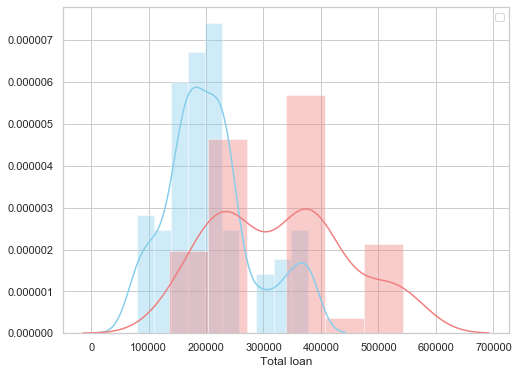

In [72]:
# your code here
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram based on Gender
plt.figure(figsize=(8, 6))
sns.distplot(transformed_data['min_loan'], kde=True, color='skyblue')
sns.distplot(transformed_data['max_loan'], kde=True,  color='lightcoral')
#plt.title('Loan distribution')
plt.xlabel('Total loan')

plt.legend()
plt.legend()
plt.show()

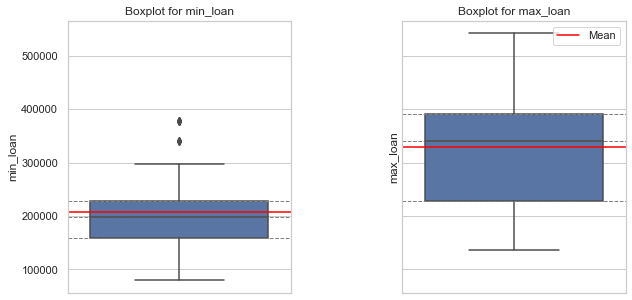

In [73]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Crear la figura y los ejes, compartiendo el eje y
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Primer boxplot para 'min_loan'
sns.boxplot(y=transformed_data['min_loan'], ax=ax[0])
ax[0].set_title('Boxplot for min_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[0].axhline(transformed_data['min_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[0].axhline(transformed_data['min_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Segundo boxplot para 'max_loan'
sns.boxplot(y=transformed_data['max_loan'], ax=ax[1])
ax[1].set_title('Boxplot for max_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[1].axhline(transformed_data['max_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[1].axhline(transformed_data['max_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.5)

# Añadir leyenda
ax[1].legend(loc='upper right')

# Mostrar la figura
plt.show()

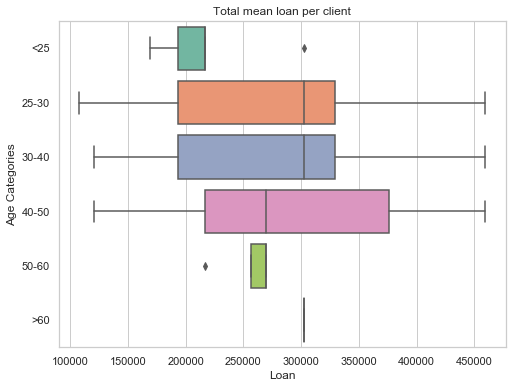

In [74]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
age_order = ['<25','25-30', '30-40', '40-50', '50-60', '>60']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(transformed_data['min_loan'] + transformed_data['max_loan']) / 2, y=transformed_data['age'],
            data=transformed_data, palette="Set2", order=age_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Age Categories')  # Agregar etiqueta para el eje y
plt.show()

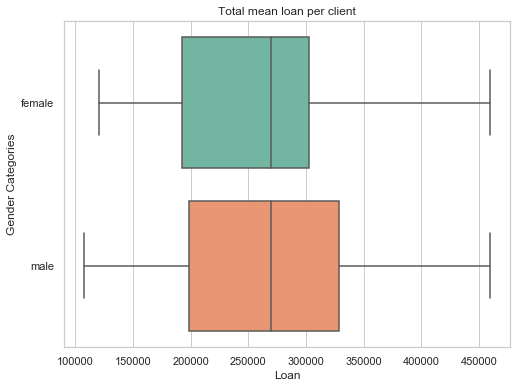

In [75]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
gender_order = ['female','male']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(transformed_data['min_loan'] + transformed_data['max_loan']) / 2, y=transformed_data['gender'],
            data=transformed_data, palette="Set2", order=gender_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Gender Categories')  # Agregar etiqueta para el eje y
plt.show()

# Outliers detection using as principal variables those related with the max and min loan 

In [76]:
transformed_data[['min_quota','max_quota','min_loan','max_loan']].describe()

,min_quota,max_quota,min_loan,max_loan
count,102.000000,102.000000,95.000000,83.000000
mean,928.431373,1281.372549,208311.578303,329920.564727
std,313.516450,440.011339,77443.910735,114457.035615
min,400.000000,600.000000,79210.491957,136405.787742
25%,800.000000,1000.000000,158420.983914,227342.979570
50%,1000.000000,1500.000000,198026.229892,341014.469355
75%,1000.000000,1500.000000,227342.979570,391778.743846
max,1500.000000,2000.000000,377030.232818,542036.339833


In [77]:
# Calcula el percentil 85
#percentile_85 = transformed_data['tu_columna'].quantile(0.85)
transformed_data['max_loan'].quantile(0.95)
# Filtra el DataFrame para mantener solo las filas que están por debajo o iguales al percentil 95
df_filtered = transformed_data[transformed_data['max_loan'] <= (transformed_data['max_loan'].quantile(0.9))]

In [78]:
df_filtered['min_loan'].quantile(0.15)
df_filtered = df_filtered[df_filtered['min_loan'] >= (df_filtered['min_loan'].quantile(0.1))]

In [79]:
df_filtered[['min_quota','max_quota','min_loan','max_loan']].describe()

,min_quota,max_quota,min_loan,max_loan
count,71.000000,71.000000,71.000000,71.000000
mean,936.619718,1301.408451,207847.433708,321657.739781
std,230.055544,355.966675,54586.038355,92021.321460
min,600.000000,800.000000,118815.737935,181874.383656
25%,800.000000,1000.000000,170147.683785,239348.234057
50%,1000.000000,1500.000000,198026.229892,341014.469355
75%,1000.000000,1500.000000,227342.979570,377030.232818
max,1500.000000,2000.000000,341014.469355,502706.977090


No handles with labels found to put in legend.
No handles with labels found to put in legend.


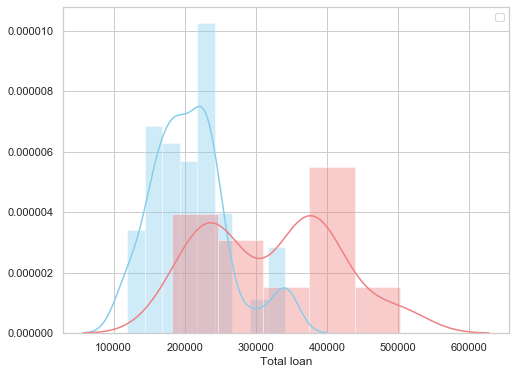

In [80]:
# your code here
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram based on Gender
plt.figure(figsize=(8, 6))
sns.distplot(df_filtered['min_loan'], kde=True, color='skyblue')
sns.distplot(df_filtered['max_loan'], kde=True,  color='lightcoral')
#plt.title('Loan distribution')
plt.xlabel('Total loan')

plt.legend()
plt.legend()
plt.show()

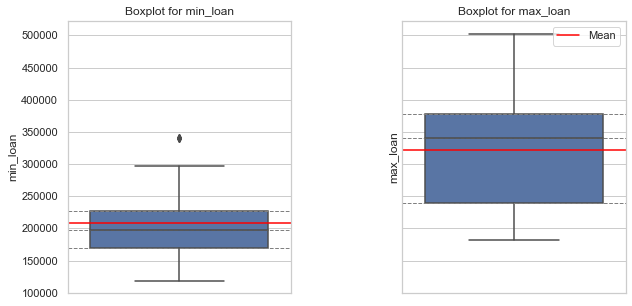

In [81]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Crear la figura y los ejes, compartiendo el eje y
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Primer boxplot para 'min_loan'
sns.boxplot(y=df_filtered['min_loan'], ax=ax[0])
ax[0].set_title('Boxplot for min_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[0].axhline(df_filtered['min_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[0].axhline(df_filtered['min_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Segundo boxplot para 'max_loan'
sns.boxplot(y=df_filtered['max_loan'], ax=ax[1])
ax[1].set_title('Boxplot for max_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[1].axhline(df_filtered['max_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[1].axhline(df_filtered['max_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.5)

# Añadir leyenda
ax[1].legend(loc='upper right')

# Mostrar la figura
plt.show()

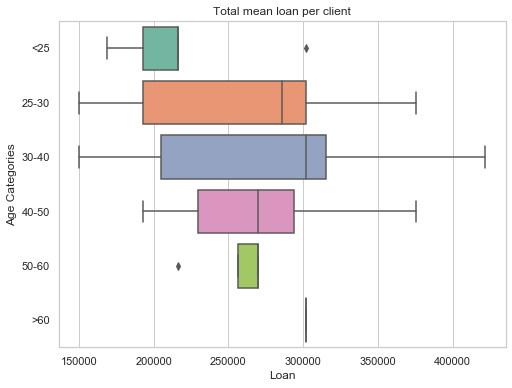

In [82]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
age_order = ['<25','25-30', '30-40', '40-50', '50-60', '>60']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(df_filtered['min_loan'] + df_filtered['max_loan']) / 2, y=df_filtered['age'],
            data=df_filtered, palette="Set2", order=age_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Age Categories')  # Agregar etiqueta para el eje y
plt.show()

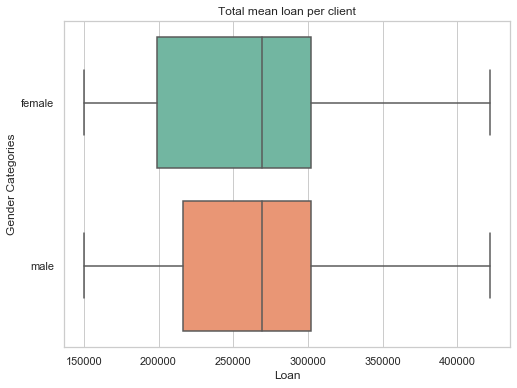

In [83]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
gender_order = ['female','male']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(df_filtered['min_loan'] + df_filtered['max_loan']) / 2, y=df_filtered['gender'],
            data=df_filtered, palette="Set2", order=gender_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Gender Categories')  # Agregar etiqueta para el eje y
plt.show()

# Outliers detection using as principal variables those related with the poblation of study:

In [84]:
df_filtered = df_filtered[df_filtered['age']!='>60']

In [85]:
df_filtered = df_filtered[df_filtered['age']!='<25']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


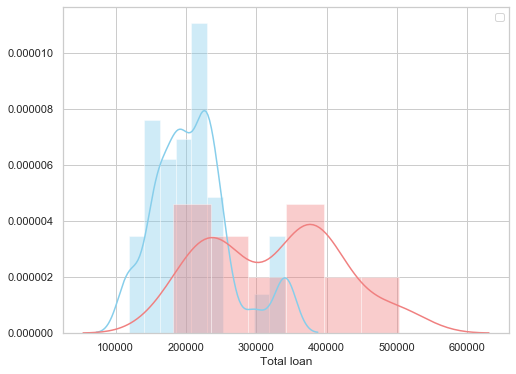

In [86]:
# your code here
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram based on Gender
plt.figure(figsize=(8, 6))
sns.distplot(df_filtered['min_loan'], kde=True, color='skyblue')
sns.distplot(df_filtered['max_loan'], kde=True,  color='lightcoral')
#plt.title('Loan distribution')
plt.xlabel('Total loan')

plt.legend()
plt.legend()
plt.show()

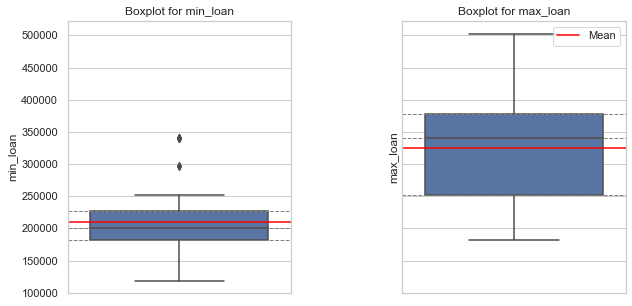

In [87]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Crear la figura y los ejes, compartiendo el eje y
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Primer boxplot para 'min_loan'
sns.boxplot(y=df_filtered['min_loan'], ax=ax[0])
ax[0].set_title('Boxplot for min_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[0].axhline(df_filtered['min_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[0].axhline(df_filtered['min_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Segundo boxplot para 'max_loan'
sns.boxplot(y=df_filtered['max_loan'], ax=ax[1])
ax[1].set_title('Boxplot for max_loan')

# Agregar líneas para cuartiles y media
for line in range(1, 4):
    ax[1].axhline(df_filtered['max_loan'].quantile(line / 4), linestyle='--', color='gray', lw=1)
ax[1].axhline(df_filtered['max_loan'].mean(), linestyle='-', color='red', lw=1.5, label='Mean')

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.5)

# Añadir leyenda
ax[1].legend(loc='upper right')

# Mostrar la figura
plt.show()

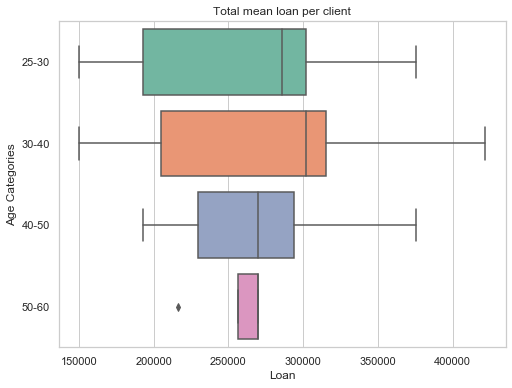

In [88]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
age_order = ['25-30', '30-40', '40-50', '50-60']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(df_filtered['min_loan'] + df_filtered['max_loan']) / 2, y=df_filtered['age'],
            data=df_filtered, palette="Set2", order=age_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Age Categories')  # Agregar etiqueta para el eje y
plt.show()

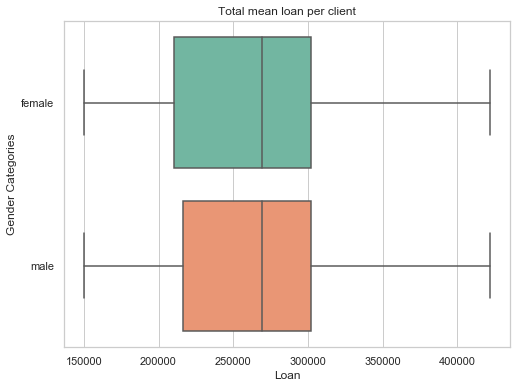

In [89]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
gender_order = ['female','male']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=(df_filtered['min_loan'] + df_filtered['max_loan']) / 2, y=df_filtered['gender'],
            data=df_filtered, palette="Set2", order=gender_order)
plt.title('Total mean loan per client')
plt.xlabel('Loan')
plt.ylabel('Gender Categories')  # Agregar etiqueta para el eje y
plt.show()

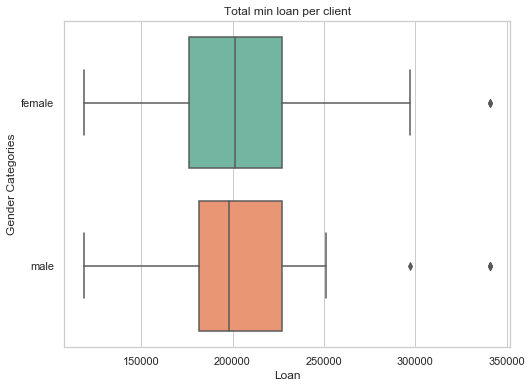

In [90]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
gender_order = ['female','male']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['min_loan'] , y=df_filtered['gender'],
            data=df_filtered, palette="Set2", order=gender_order)
plt.title('Total min loan per client')
plt.xlabel('Loan')
plt.ylabel('Gender Categories')  # Agregar etiqueta para el eje y
plt.show()

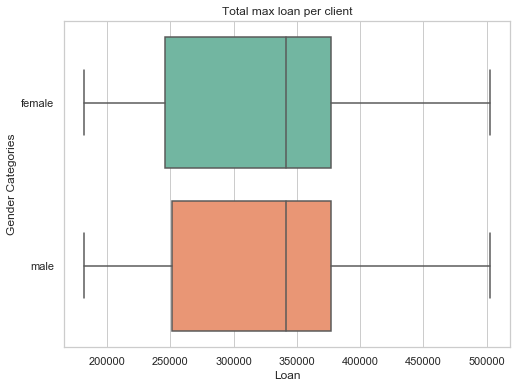

In [91]:
# Set Seaborn style
sns.set(style="whitegrid")

# Definir el orden deseado de las categorías de 'age'
gender_order = ['female','male']

# Crear un boxplot de Age por Pclass con el orden personalizado
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['max_loan'] , y=df_filtered['gender'],
            data=df_filtered, palette="Set2", order=gender_order)
plt.title('Total max loan per client')
plt.xlabel('Loan')
plt.ylabel('Gender Categories')  # Agregar etiqueta para el eje y
plt.show()

In [92]:
#df_filtered.to_csv('survey_clean.csv', index=False)

In [93]:
df_filtered.to_excel('survey_clean.xlsx', index=False)

# Choosing segmentation variable: 

# Gender:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


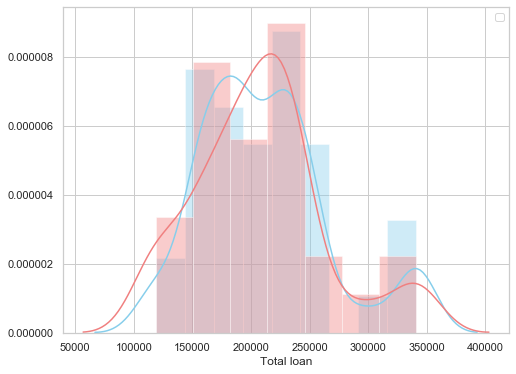

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

# Create a histogram based on Gender
plt.figure(figsize=(8, 6))
sns.distplot(df_filtered[df_filtered['gender']=='male']['min_loan'], kde=True, color='skyblue')
sns.distplot(df_filtered[df_filtered['gender']=='female']['min_loan'], kde=True,  color='lightcoral')
#plt.title('Loan distribution')
plt.xlabel('Total loan')

plt.legend()
plt.legend()
plt.show()

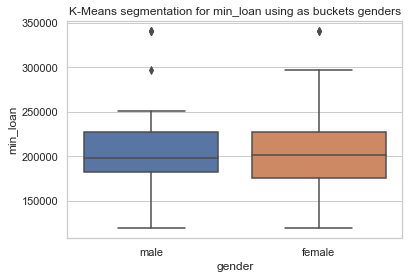

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supongamos que tienes un DataFrame llamado 'your_data'
# con una variable cuantitativa 'variable_cuantitativa'
# y una variable categórica 'variable_categorica'

# Ajusta el número de clusters según tus necesidades
num_clusters = 2

# Crear una nueva columna 'cluster' basada en K-Means
X = df_filtered[['min_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='gender', y='min_loan',  data=df_filtered)
plt.title('K-Means segmentation for min_loan using as buckets genders')
plt.show()

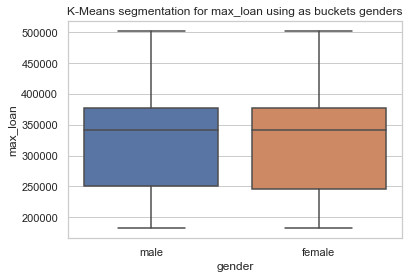

In [96]:
#from sklearn.cluster import KMeans

# Ajusta el número de clusters según tus necesidades
num_clusters = 2

# Crear una nueva columna 'cluster' basada en K-Means
X = df_filtered[['max_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='gender', y='max_loan',  data=df_filtered)
plt.title('K-Means segmentation for max_loan using as buckets genders')
plt.show()

In [97]:
from scipy.stats import f_oneway

# Obtener las categorías únicas de 'age'
unique_age_categories = df_filtered['gender'].unique()

# Crear una lista de grupos para ANOVA
category_groups = [df_filtered[df_filtered['gender'] == category]['max_loan'] for category in unique_age_categories]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Imprimir los resultados
print("ANOVA analysis for 'max_loan' and 'gender'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("There are significative differences between max_loan values for each bucket of gender.")
else:
    print("There are no signigicative evidences of validating gender as segmentation variable for max_loan.")

ANOVA analysis for 'max_loan' and 'gender'
F-Statistic: 0.02478881508789575
P-Value: 0.8753979625341608
There are no signigicative evidences of validating gender as segmentation variable for max_loan.


In [98]:
from scipy.stats import f_oneway

# Obtener las categorías únicas de 'age'
unique_age_categories = df_filtered['gender'].unique()

# Crear una lista de grupos para ANOVA
category_groups = [df_filtered[df_filtered['gender'] == category]['min_loan'] for category in unique_age_categories]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Imprimir los resultados
print("ANOVA analysis for 'min_loan' and 'gender'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("There are significative differences between min_loan values for each bucket of gender.")
else:
    print("There are no signigicative evidences of validating gender as segmentation variable for min_loan.")

ANOVA analysis for 'min_loan' and 'gender'
F-Statistic: 0.054822535460492886
P-Value: 0.8156338831947917
There are no signigicative evidences of validating gender as segmentation variable for min_loan.


# Ways of living:

In [99]:
df_filtered['way_of_living'].unique()

array(['partner', 'alone', 'family', 'friends'], dtype=object)

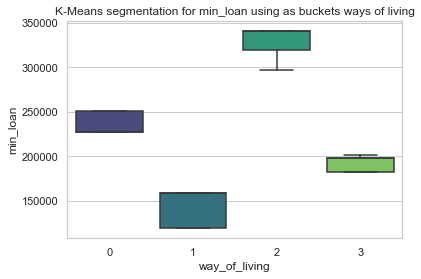

In [100]:
# Ajusta el número de clusters según tus necesidades
num_clusters = 4

# Crear una nueva columna 'way_of_living' basada en K-Means
X = df_filtered[['min_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['way_of_living'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='way_of_living', y='min_loan', data=df_filtered, palette='viridis')
plt.title('K-Means segmentation for min_loan using as buckets ways of living')
plt.show()

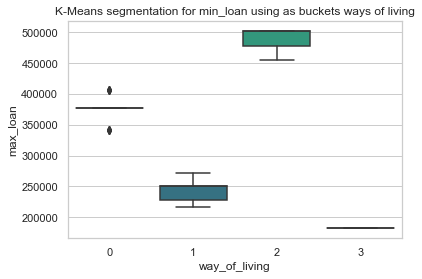

In [101]:
# Ajusta el número de clusters según tus necesidades
num_clusters = 4

# Crear una nueva columna 'way_of_living' basada en K-Means
X = df_filtered[['max_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['way_of_living'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='way_of_living', y='max_loan', data=df_filtered, palette='viridis')
plt.title('K-Means segmentation for min_loan using as buckets ways of living')
plt.show()

In [102]:
from scipy.stats import f_oneway

# Obtener las categorías únicas de 'age'
unique_age_categories = df_filtered['way_of_living'].unique()

# Crear una lista de grupos para ANOVA
category_groups = [df_filtered[df_filtered['way_of_living'] == category]['max_loan'] for category in unique_age_categories]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Imprimir los resultados
print("ANOVA analysis for 'max_loan' and 'way_of_living'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("There are significative differences between max_loan values for each bucket of way_of_living.")
else:
    print("There are no signigicative evidences of validating way_of_living as segmentation variable for max_loan.")

ANOVA analysis for 'max_loan' and 'way_of_living'
F-Statistic: 430.63855893509606
P-Value: 5.482726717226668e-41
There are significative differences between max_loan values for each bucket of way_of_living.


In [103]:
from scipy.stats import f_oneway

# Obtener las categorías únicas de 'age'
unique_age_categories = df_filtered['way_of_living'].unique()

# Crear una lista de grupos para ANOVA
category_groups = [df_filtered[df_filtered['way_of_living'] == category]['min_loan'] for category in unique_age_categories]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Imprimir los resultados
print("ANOVA analysis for 'min_loan' and 'way_of_living'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("There are significative differences between max_loan values for each bucket of way_of_living.")
else:
    print("There are no signigicative evidences of validating way_of_living as segmentation variable for min_loan.")

ANOVA analysis for 'min_loan' and 'way_of_living'
F-Statistic: 195.25647325646543
P-Value: 3.190014545134824e-31
There are significative differences between max_loan values for each bucket of way_of_living.


# Age:

In [104]:
df_filtered['age'].nunique()

4

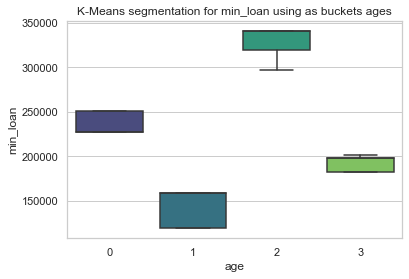

In [105]:
# Ajusta el número de clusters según tus necesidades
num_clusters = 4

# Crear una nueva columna 'cluster' basada en K-Means
X = df_filtered[['min_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['age'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='age', y='min_loan', data=df_filtered, palette='viridis')
plt.title('K-Means segmentation for min_loan using as buckets ages')
plt.show()

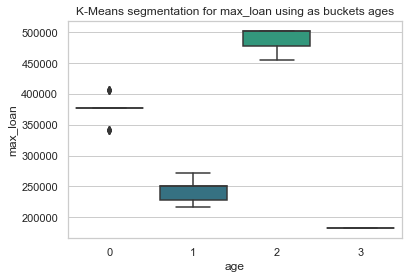

In [106]:
# Ajusta el número de clusters según tus necesidades
num_clusters = 4

# Crear una nueva columna 'cluster' basada en K-Means
X = df_filtered[['max_loan']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_filtered['age'] = kmeans.fit_predict(X)

# Verifica cómo se distribuyen las categorías en los clusters
sns.boxplot(x='age', y='max_loan', data=df_filtered, palette='viridis')
plt.title('K-Means segmentation for max_loan using as buckets ages')
plt.show()

In [107]:
from scipy.stats import f_oneway

# Unique categories for'age'
unique_age_categories = df_filtered['age'].unique()

# Categ. for groups ANOVA
category_groups = [df_filtered[df_filtered['age'] == category]['max_loan'] for category in unique_age_categories]

# (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Results
print("ANOVA analysis for 'max_loan' and 'age'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("There are significative differences between max_loan values for each bucket of age.")
else:
    print("There are no signigicative evidences of validating age as segmentation variable for max_loan.")

ANOVA analysis for 'max_loan' and 'age'
F-Statistic: 430.63855893509606
P-Value: 5.482726717226668e-41
There are significative differences between max_loan values for each bucket of age.


In [108]:
from scipy.stats import f_oneway

# Obtener las categorías únicas de 'age'
unique_age_categories = df_filtered['age'].unique()

# Crear una lista de grupos para ANOVA
category_groups = [df_filtered[df_filtered['age'] == category]['min_loan'] for category in unique_age_categories]

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(*category_groups)

# Imprimir los resultados
print("ANOVA analysis for 'min_loan' and 'age'")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("There are significative differences between min_loan values for each bucket of age.")
else:
    print("There are no signigicative evidences of validating age as segmentation variable for min_loan.")

ANOVA analysis for 'min_loan' and 'age'
F-Statistic: 195.25647325646543
P-Value: 3.190014545134824e-31
There are significative differences between min_loan values for each bucket of age.


In [109]:
print('Age and ways of living are good segmentation drivers for min and max loans. However, gender is discarded to be used as segmentation variable ')

Age and ways of living are good segmentation drivers for min and max loans. However, gender is discarded to be used as segmentation variable 


In [110]:
df_filtered

,record_date,contract_type,age,gender,districts,house_status,client_priorities,floor,way_of_living,rooms,...,middle_floors,attic,house/chalet,house/chalet,attic,middle_floors,ground_floor,min_area,max_area,cluster
0,2024-01-09 21:08:43.857,purchase,1,male,Fuencarral-El Pardo,good status,good services,"middle_floors, house/chalet",1,2,...,1,0,1,1,0,0,0,70.0,90.0,1
1,2024-01-09 21:25:03.589,purchase,1,male,Hortaleza,to reform,good services,middle_floors,1,2,...,1,0,0,0,0,0,0,70.0,90.0,1
4,2024-01-09 21:39:23.857,purchase,0,female,"Chamberí,Moncloa-Aravaca,Ciudad Lineal",good status,"public transport,terrace,garage,good services,...",middle_floors,0,3,...,1,0,0,0,0,0,0,90.0,120.0,0
5,2024-01-09 21:40:06.588,purchase,1,female,"Centro,Hortaleza,San Blás-Canillejas,Barajas",,"public transport,elevator,garage,good services...","attic, house/chalet",1,3,...,0,0,1,1,1,0,0,NaN,NaN,1
6,2024-01-09 21:40:23.998,purchase,0,female,"Retiro,B.Salamanca,Tetuán,Chamberí,Moncloa-Ara...",new,"terrace,elevator,good services,exterior,wardrobes",attic,0,1,...,0,0,0,0,1,0,0,50.0,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024-01-11 16:13:50.257,purchase,0,female,"Retiro,B.Salamanca,Moncloa-Aravaca,Otro",new,"terrace,garage,good services,exterior,Jardín","attic, house/chalet",0,"3, 4 o más",...,0,0,1,1,1,0,0,70.0,NaN,0
107,2024-01-11 16:36:39.473,purchase,2,male,"Centro,Retiro,B.Salamanca,Chamberí,Moncloa-Ara...","good status,new","public transport,terrace,elevator,garage,good ...","attic, house/chalet",2,2,...,0,0,1,1,1,0,0,50.0,70.0,0
108,2024-01-11 17:22:17.148,purchase,1,male,"Moratalaz,Ciudad Lineal,Hortaleza,Villa de Val...","to reform,good status","public transport,elevator,garage,good services","middle_floors, house/chalet",1,3,...,1,0,1,1,0,0,0,70.0,90.0,1
110,2024-01-11 19:55:46.874,purchase,0,male,"Fuencarral-El Pardo,Hortaleza,Chamartín","to reform,good status","public transport,elevator,good services,exterior","middle_floors, house/chalet",0,"2, 3",...,1,0,1,1,0,0,0,70.0,90.0,0
